In [1]:
import forecasting_followers
from get_all_followers import get_broadcaster_list
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

generate 4 users of varying sizes

In [2]:
broadcasters = get_broadcaster_list()
broadcasters

173 Unique broadcasters out of 200 stream pulls


,broadcaster_ids,follower_totals
0,36769016,1399363
1,41314239,108395
2,137724090,102353
3,23397860,206547
6,146813379,4026
8,39568921,23921
9,3481156,114959
11,131925644,45784
12,100837532,30590
14,145808617,14162


In [3]:
user_list = [137724090, 131925644, 25880631,145986151]

In [28]:
m0, forecast0, weekly_sum0, total_followers0 = forecasting_followers.apply_fb_prophet(user_list[0], freq = 'W')
m1, forecast1, weekly_sum1, total_followers1 = forecasting_followers.apply_fb_prophet(user_list[1])
m2, forecast2, weekly_sum2, total_followers2 = forecasting_followers.apply_fb_prophet(user_list[2])
m3, forecast3, weekly_sum3, total_followers3 = forecasting_followers.apply_fb_prophet(user_list[3])

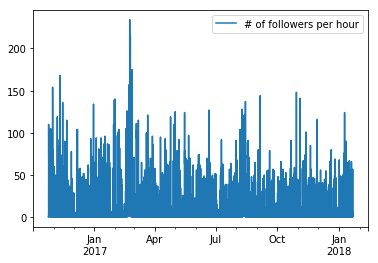

In [5]:
a = weekly_sum0.plot(y = 'follower_added',label = '# of followers per hour')
plt.legend()

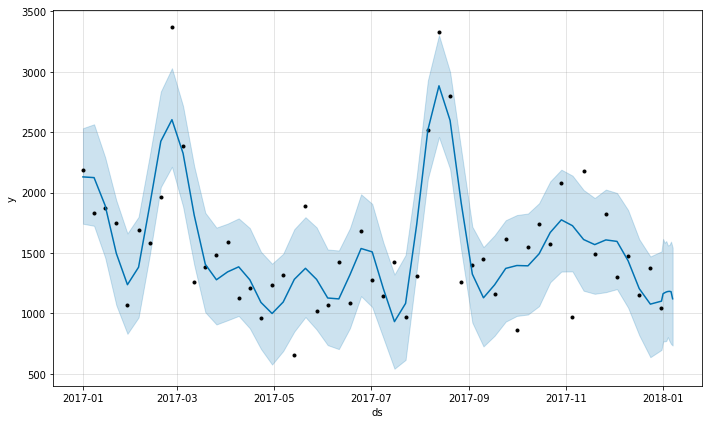

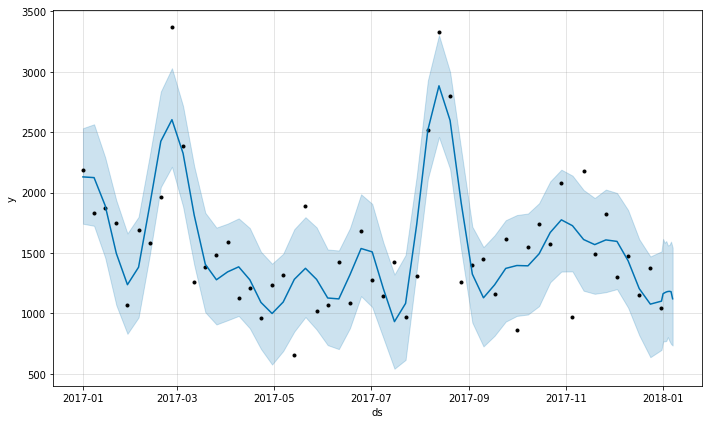

In [6]:
plt.close()
m0.plot(forecast0)

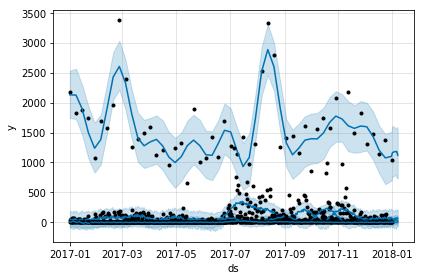

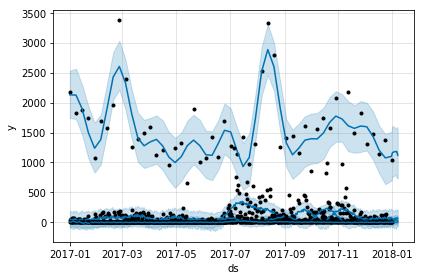

In [7]:
fig, ax = plt.subplots()
m0.plot(forecast0, ax = ax)
m1.plot(forecast1, ax = ax)
m2.plot(forecast2, ax = ax)
m3.plot(forecast3, ax = ax)

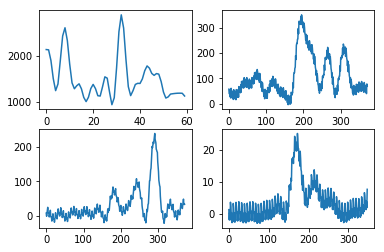

In [8]:
fig1 = plt.subplots(2,2)
Y0 = forecast0['yhat'].values
Y1 = forecast1['yhat'].values
Y2 = forecast2['yhat'].values
Y3 = forecast3['yhat'].values
plt.subplot(221)
plt.plot(Y0)
plt.subplot(222)
plt.plot(Y1)
plt.subplot(223)
plt.plot(Y2)
plt.subplot(224)
plt.plot(Y3)



apply_facebook_prophet projects over the next 7 days, extract 7 days worth of information from forecast and weekly_sum

In [9]:
forecast_date_end = forecast0['ds'].iloc[-1]
forecast_date_start = forecast0['ds'].iloc[-7]
print('The dates that we predicted were from {} to {}'.format(forecast_date_end, forecast_date_start))

The dates that we predicted were from 2018-01-07 00:00:00 to 2018-01-01 00:00:00


extract date range from forecast and actual and plot together to evaluate prediction

Your R score is -54.25332357532161
Your MAE is 953.6421330977191
Your sqrt(MSE) is 961.1941564322466
actual : 1500
predicted : 8175.494931684034
85 : 11067.79558327391
min : 5362.83174389279


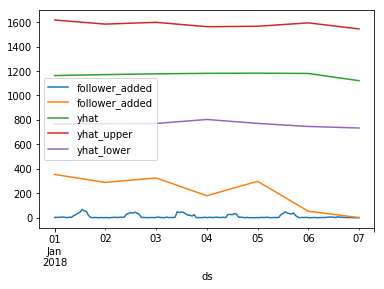

In [10]:
forecast_range = (forecast0['ds'] >= forecast_date_start) & (forecast0['ds'] <= forecast_date_end)
predicted_df = forecast0[forecast_range]
actual_range = (weekly_sum0.index >= forecast_date_start) & (weekly_sum0.index <= forecast_date_end)
actual_df = weekly_sum0[actual_range]
fig2, ax2 = plt.subplots()
actual_df.plot(ax = ax2)
actual_df_day = actual_df.resample('D').sum()
actual_df_day.plot(ax = ax2)
predicted_df.plot(x = 'ds', y = 'yhat',ax = ax2)
predicted_df.plot(x = 'ds', y = 'yhat_upper',ax = ax2)
predicted_df.plot(x = 'ds', y = 'yhat_lower',ax = ax2)

print('Your R score is {}'.format(r2_score(actual_df_day,predicted_df['yhat'])))
print('Your MAE is {}'.format(mean_absolute_error(actual_df_day, predicted_df['yhat'])))
print('Your sqrt(MSE) is {}'.format(np.sqrt(mean_squared_error(actual_df_day, predicted_df['yhat']))))

actual_total = actual_df['follower_added'].sum()
predicted_total = predicted_df['yhat'].sum()
predicted_max = predicted_df['yhat_upper'].sum()
predicted_min = predicted_df['yhat_lower'].sum()

print('actual : {}\npredicted : {}\n85 : {}\nmin : {}'.format(actual_total,predicted_total,predicted_max,predicted_min))


Repeat with 3 other streams

Youre MAE is 65.60242513678503
Your sqrt(MSE) is 78.5859796717247
actual : 739
predicted : 417.02479684697005
85 : 1400.6536367796048
min : -545.717053419165


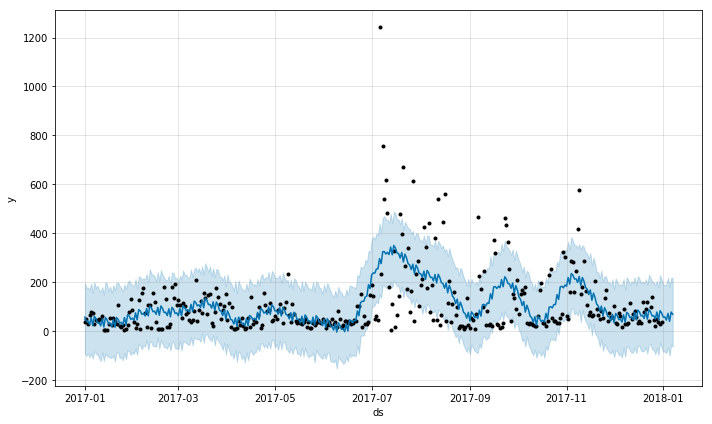

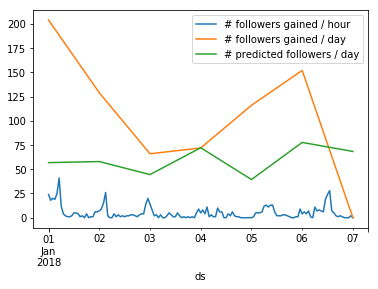

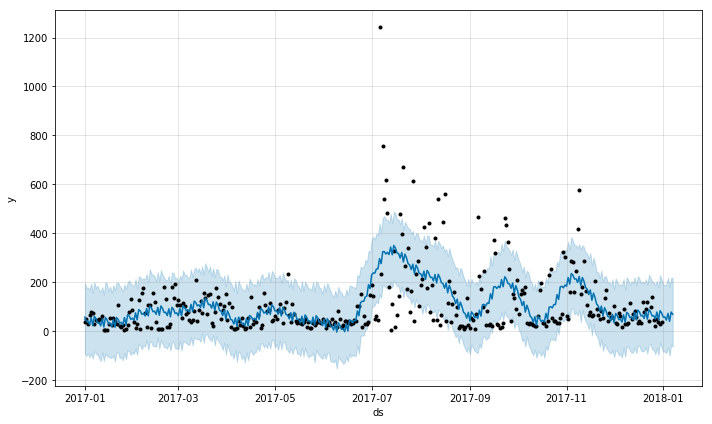

In [30]:
forecast_range = (forecast1['ds'] >= forecast_date_start) & (forecast1['ds'] <= forecast_date_end)
predicted_df = forecast1[forecast_range]
actual_range = (weekly_sum1.index >= forecast_date_start) & (weekly_sum1.index <= forecast_date_end)
actual_df = weekly_sum1[actual_range]

fig3, ax3 = plt.subplots()
actual_df.plot(y = 'follower_added',ax = ax3, label = "# followers gained / hour")
plt.legend()
actual_df_day = actual_df.resample('D').sum()
actual_df_day.plot(y='follower_added',ax = ax3, label = "# followers gained / day")
plt.legend()
predicted_df.plot(x = 'ds', y = 'yhat',ax = ax3, label = "# predicted followers / day")
plt.legend()
#predicted_df.plot(x = 'ds', y = 'yhat_upper',ax = ax3)
#predicted_df.plot(x = 'ds', y = 'yhat_lower',ax = ax3)

print('Youre MAE is {}'.format(mean_absolute_error(actual_df_day, predicted_df['yhat'])))
print('Your sqrt(MSE) is {}'.format(np.sqrt(mean_squared_error(actual_df_day, predicted_df['yhat']))))

actual_total = actual_df['follower_added'].sum()
predicted_total = predicted_df['yhat'].sum()
predicted_max = predicted_df['yhat_upper'].sum()
predicted_min = predicted_df['yhat_lower'].sum()

print('actual : {}\npredicted : {}\n85 : {}\nmin : {}'.format(actual_total,predicted_total,predicted_max,predicted_min))

m1.plot(forecast1)



Your R score is -17.040879079937056
Youre MAE is 20.825294557926448
Your sqrt(MSE) is 22.22834177501434
actual : 88
predicted : 233.77706190548514
85 : 796.7546674929594
min : -304.2493301851067


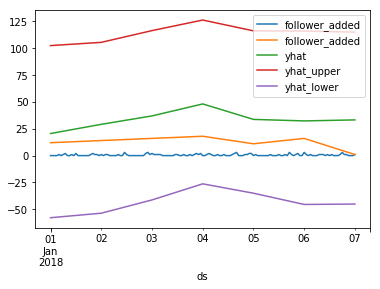

In [12]:
forecast_range = (forecast2['ds'] >= forecast_date_start) & (forecast2['ds'] <= forecast_date_end)
predicted_df = forecast2[forecast_range]
actual_range = (weekly_sum2.index >= forecast_date_start) & (weekly_sum2.index <= forecast_date_end)
actual_df = weekly_sum2[actual_range]
fig4, ax4 = plt.subplots()
actual_df.plot(ax = ax4)
actual_df_day = actual_df.resample('D').sum()
actual_df_day.plot(ax = ax4)
predicted_df.plot(x = 'ds', y = 'yhat',ax = ax4)
predicted_df.plot(x = 'ds', y = 'yhat_upper',ax = ax4)
predicted_df.plot(x = 'ds', y = 'yhat_lower',ax = ax4)

print('Your R score is {}'.format(r2_score(actual_df_day,predicted_df['yhat'])))
print('Youre MAE is {}'.format(mean_absolute_error(actual_df_day, predicted_df['yhat'])))
print('Your sqrt(MSE) is {}'.format(np.sqrt(mean_squared_error(actual_df_day, predicted_df['yhat']))))

actual_total = actual_df['follower_added'].sum()
predicted_total = predicted_df['yhat'].sum()
predicted_max = predicted_df['yhat_upper'].sum()
predicted_min = predicted_df['yhat_lower'].sum()

print('actual : {}\npredicted : {}\n85 : {}\nmin : {}'.format(actual_total,predicted_total,predicted_max,predicted_min))


Your R score is -1.003985727028688
Youre MAE is 3.3305818910354934
Your sqrt(MSE) is 4.690729722486367
actual : 22
predicted : 27.434515277834087
85 : 125.44256185940503
min : -76.8745002059594


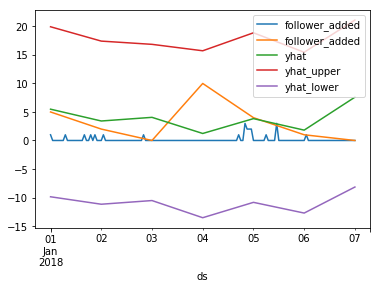

In [13]:
forecast_range = (forecast3['ds'] >= forecast_date_start) & (forecast3['ds'] <= forecast_date_end)
predicted_df = forecast3[forecast_range]
actual_range = (weekly_sum3.index >= forecast_date_start) & (weekly_sum3.index <= forecast_date_end)
actual_df = weekly_sum3[actual_range]
fig5, ax5 = plt.subplots()
actual_df.plot(ax = ax5)
actual_df_day = actual_df.resample('D').sum()
actual_df_day.plot(ax = ax5)
predicted_df.plot(x = 'ds', y = 'yhat',ax = ax5)
predicted_df.plot(x = 'ds', y = 'yhat_upper',ax = ax5)
predicted_df.plot(x = 'ds', y = 'yhat_lower',ax = ax5)

print('Your R score is {}'.format(r2_score(actual_df_day['follower_added'].values,predicted_df['yhat'].values)))
print('Youre MAE is {}'.format(mean_absolute_error(actual_df_day, predicted_df['yhat'])))
print('Your sqrt(MSE) is {}'.format(np.sqrt(mean_squared_error(actual_df_day, predicted_df['yhat']))))

actual_total = actual_df['follower_added'].sum()
predicted_total = predicted_df['yhat'].sum()
predicted_max = predicted_df['yhat_upper'].sum()
predicted_min = predicted_df['yhat_lower'].sum()

print('actual : {}\npredicted : {}\n85 : {}\nmin : {}'.format(actual_total,predicted_total,predicted_max,predicted_min))


In [14]:
test = actual_df.resample('D').sum()
test.head()

,follower_added
2018-01-01,5
2018-01-02,2
2018-01-03,0
2018-01-04,10
2018-01-05,4


In [15]:
m5, forecast5, weekly_sum5, total_followers5 = forecasting_followers.apply_fb_prophet(user_list[1], freq = 'W')